<a href="https://colab.research.google.com/github/matheus-garcia/ds_practice/blob/main/TTML_Exc01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Consumo de cerveja**

## 0. Bibliotecas e Datasets

In [1]:
# Default
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Isolation forest -> outliers dit. normal
from sklearn.ensemble import IsolationForest

# train_test_split -> Separacao dos dados em train e test
from sklearn.model_selection import train_test_split

# Selecao de features -> SelectKBest
# Funcao de custo -> f_regression que retorna o p-values
from sklearn.feature_selection import SelectKBest, f_regression

# LinearRegression do sklearn
from sklearn.linear_model import LinearRegression

In [2]:
# Fazendo download da base de dados

!rm -f *.csv

!wget https://www.dropbox.com/s/tlsiq53yt4fomm9/consumo_cerveja.csv

--2021-11-05 17:38:22--  https://www.dropbox.com/s/tlsiq53yt4fomm9/consumo_cerveja.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tlsiq53yt4fomm9/consumo_cerveja.csv [following]
--2021-11-05 17:38:23--  https://www.dropbox.com/s/raw/tlsiq53yt4fomm9/consumo_cerveja.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce971fbafb3d431912479932b7e.dl.dropboxusercontent.com/cd/0/inline/BZZHFtcrUv2bUNalAF7rjhktfsArfTsLCw0XzLk0saGsg49NIDqrKanQhYe_jSZ2s9-bal86U2Gv-L56EZecB9HhE2NZJjDzS3GRPbICS3B_qNjsHaq7I9pkjo8z7Z50mBL34h3zgEG1zfzvByqRUTyd/file# [following]
--2021-11-05 17:38:23--  https://uce971fbafb3d431912479932b7e.dl.dropboxusercontent.com/cd/0/inline/BZZHFtcrUv2bUNalAF7rjhktfsArfTsLCw0XzLk0saGsg49NIDqrKanQhYe_jSZ2s9-ba

##1. Carregando os dados

In [3]:
# Carregando a base de dados do exercício

raw_beer = pd.read_csv('consumo_cerveja.csv')

##2. Limpeza de Dados / Pre-processamento

In [4]:
# Verificando tamanho e tipo de dados

display(raw_beer.dtypes)
display(raw_beer.shape)

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                  int64
Consumo de cerveja (litros)    float64
dtype: object

(365, 7)

In [5]:
# Dados faltantes

raw_beer.isna().sum()

# SEM DADOS FALTANTES!!!

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [6]:
# Criando uma copia do raw_beer para limpeza

df_beer = raw_beer.copy()

df_beer.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1,29.799
4,2015-01-05,"23,82",21,"28,3",0,0,28.900


###**2.1 Renomeando as colunas**

In [7]:
df_beer.rename(columns={'Temperatura Media (C)' : 'temp_med',
                        'Temperatura Maxima (C)' : 'temp_max',
                        'Temperatura Minima (C)' : 'temp_min',
                        'Data' : 'data',
                        'Precipitacao (mm)' : 'chuva',
                        'Final de Semana' : 'fin_sem',
                        'Consumo de cerveja (litros)' : 'consumo'},
               inplace=True)

###**2.2 Substituindo as virgulas por pontos**

In [8]:
df_beer["temp_med"]=df_beer["temp_med"].str.replace(',','.')
df_beer["temp_max"]=df_beer["temp_max"].str.replace(',','.')
df_beer["temp_min"]=df_beer["temp_min"].str.replace(',','.')
df_beer["chuva"]=df_beer["chuva"].str.replace(',','.')

###**2.3 Transformando dados tipo object para numericos**

In [9]:
df_beer["temp_med"] = pd.to_numeric(df_beer["temp_med"])
df_beer["temp_max"] = pd.to_numeric(df_beer["temp_max"])
df_beer["temp_min"] = pd.to_numeric(df_beer["temp_min"])
df_beer["chuva"] = pd.to_numeric(df_beer["chuva"])

###**2.4 Transformando o fin_sem em valores lógicos**

In [10]:
df_beer['fin_sem'] = df_beer["fin_sem"].astype('int32')

df_beer.head()

,data,temp_med,temp_min,temp_max,chuva,fin_sem,consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


###**2.5 Transformando os dados de data para date_time**

In [11]:
df_beer['data'] = pd.to_datetime(df_beer['data'])

df_beer.head()

,data,temp_med,temp_min,temp_max,chuva,fin_sem,consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


###**2.6 Verificando novamente o tipo dos objetos**

In [12]:
df_beer.dtypes

data        datetime64[ns]
temp_med           float64
temp_min           float64
temp_max           float64
chuva              float64
fin_sem              int32
consumo            float64
dtype: object

## 3. Verificando Outliers

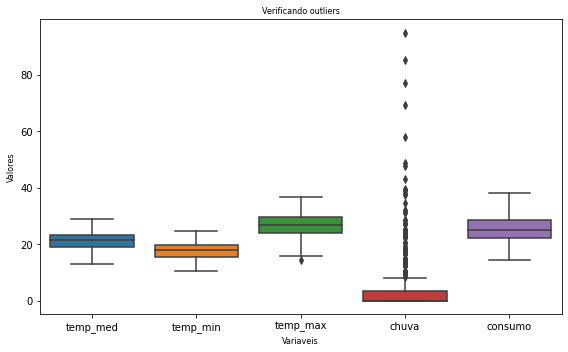

In [13]:
# Verificando outliers com boxplot

plt.figure(figsize=(8,5))

# Removendo as colunas data e final de semana para analise
sns.boxplot(data=df_beer.drop(columns=['data', 'fin_sem']).melt(),
            x='variable',
            y='value')

plt.xlabel('Variaveis', fontsize=8)
plt.ylabel('Valores', fontsize=8)
plt.title('Verificando outliers', fontsize=8)

plt.tight_layout()
plt.show()

In [14]:
# Verificando o motivo de tantos outliers -> zeros inflacionados

# Verificando a quantidade de zeros na coluna referente a precipitacao

filtro = df_beer['chuva'] == 0
df_beer[filtro].count()

# 218 linhas de 365

data        218
temp_med    218
temp_min    218
temp_max    218
chuva       218
fin_sem     218
consumo     218
dtype: int64

###**3.1 Retirando a coluna chuva da analise**

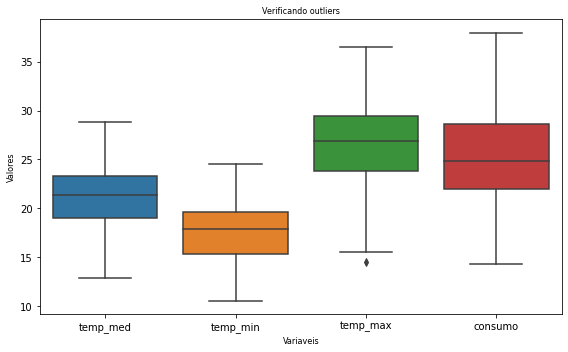

In [15]:
plt.figure(figsize=(8,5))

# Removendo as colunas data e final de semana para analise
sns.boxplot(data=df_beer.drop(columns=['data', 'fin_sem', 'chuva']).melt(),
            x='variable',
            y='value')

plt.xlabel('Variaveis', fontsize=8)
plt.ylabel('Valores', fontsize=8)
plt.title('Verificando outliers', fontsize=8)

plt.tight_layout()
plt.show()

###**3.2 Ajustando a coluna temp_max para nao ter outlier com o IsolationForest**

In [16]:
iso = IsolationForest(contamination=0.05)

filtro = iso.fit_predict(df_beer.drop(columns=['data',
                                               'fin_sem',
                                               'chuva'])) != -1

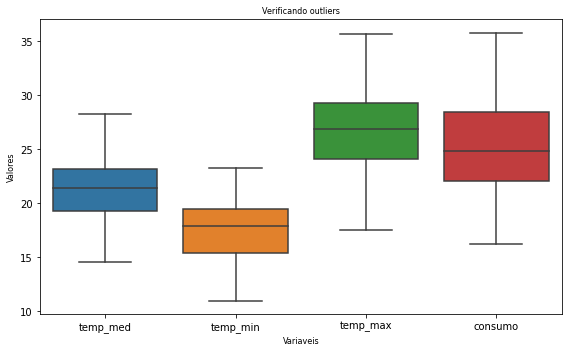

In [17]:
plt.figure(figsize=(8,5))

# Removendo as colunas data e final de semana para analise
sns.boxplot(data=df_beer[filtro].drop(columns=['data',
                                               'fin_sem',
                                               'chuva']).melt(),
            x='variable',
            y='value')

plt.xlabel('Variaveis', fontsize=8)
plt.ylabel('Valores', fontsize=8)
plt.title('Verificando outliers', fontsize=8)

plt.tight_layout()
plt.show()

In [18]:
df_beer.count()

data        365
temp_med    365
temp_min    365
temp_max    365
chuva       365
fin_sem     365
consumo     365
dtype: int64

In [19]:
df_beer[filtro].count()

data        346
temp_med    346
temp_min    346
temp_max    346
chuva       346
fin_sem     346
consumo     346
dtype: int64

In [20]:
df_beer = df_beer[filtro]

###**3.3 Removendo colunas que nao serao utilizadas na analise**

In [21]:
df_beer = df_beer.drop(columns=['fin_sem', 'data'])

##4. Serapacao dos dados

###**4.1 Definindo features e rotulos**

In [22]:
# Olhadinha

df_beer.head()

,temp_med,temp_min,temp_max,chuva,consumo
2,24.82,22.4,29.9,0.0,30.814
3,23.98,21.5,28.6,1.2,29.799
4,23.82,21.0,28.3,0.0,28.900
5,23.78,20.1,30.5,12.2,28.218
6,24.00,19.5,33.7,0.0,29.732


In [23]:
# Ajeitando o indice

df_beer.reset_index(inplace=True)
df_beer.drop(columns=['index'], inplace=True)

display(df_beer.head())
display(df_beer.tail())

,temp_med,temp_min,temp_max,chuva,consumo
0,24.82,22.4,29.9,0.0,30.814
1,23.98,21.5,28.6,1.2,29.799
2,23.82,21.0,28.3,0.0,28.900
3,23.78,20.1,30.5,12.2,28.218
4,24.00,19.5,33.7,0.0,29.732


,temp_med,temp_min,temp_max,chuva,consumo
341,24.00,21.1,28.2,13.6,32.307
342,22.64,21.1,26.7,0.0,26.095
343,21.68,20.3,24.1,10.3,22.309
344,21.38,19.3,22.4,6.3,20.467
345,24.76,20.2,29.0,0.0,22.446


In [24]:
# Features (X):

X = df_beer.iloc[:, 0:-1]

# Alvo/rotulo (Y):

y = df_beer.iloc[:, -1]

###**4.2 Separacao dos dados com *train_test_split***

In [25]:
# Separacao dos dados, 80% treino e 20% teste 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [26]:
# Verificando o shape dos dados

print(f'Tamanho total de X: {X.shape}')
print(f'Tamanho do treino de X: {X_train.shape}')
print(f'Tamanho do teste de X: {X_test.shape}')

print(f'Tamanho total de y: {y.shape}')
print(f'Tamanho do treino de y: {y_train.shape}')
print(f'Tamanho do teste de y: {y_test.shape}')

Tamanho total de X: (346, 4)
Tamanho do treino de X: (276, 4)
Tamanho do teste de X: (70, 4)
Tamanho total de y: (346,)
Tamanho do treino de y: (276,)
Tamanho do teste de y: (70,)


4.2.1. Selecionando a melhor feature com a SelectKBest do sklearn.feature_models utilizando a funcao f_regression onde k pega todos os parametros para visualizacao

In [27]:
fs = SelectKBest(score_func=f_regression, k='all')
fs

SelectKBest(k='all', score_func=<function f_regression at 0x7fa3a8bb3e60>)

4.2.2. Para treinar o modelo sera utilizada a funcao fit passando o X_train e y_train

In [28]:
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x7fa3a8bb3e60>)

4.2.3. Verificando os cores

In [29]:
# Quanto maior a relevancia da feature, melhor.

fs.scores_

# Pelos scores, vemos que a temp. max eh o paramentro mais "influente" no consumo

for i, valor in enumerate(fs.scores_):
  print('Param {}: {:.1f}'.format(X_train.columns[i], valor))

Param temp_med: 113.5
Param temp_min: 39.6
Param temp_max: 168.1
Param chuva: 7.6


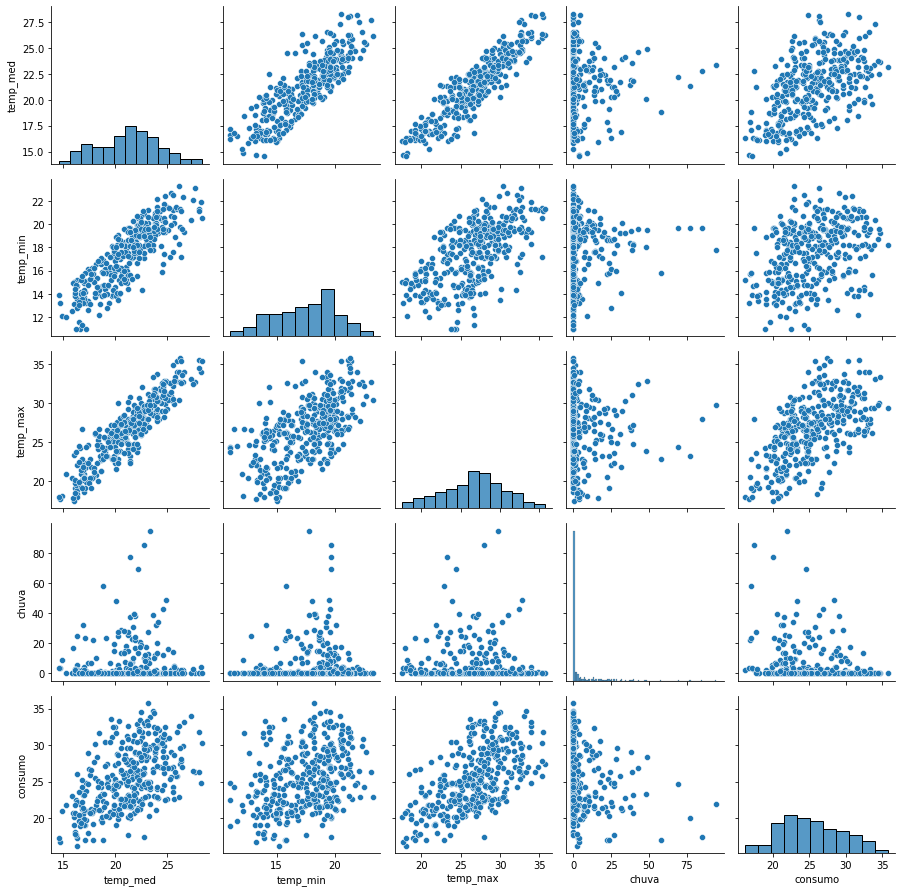

In [30]:
# Plotando pairplot

sns.pairplot(df_beer)

plt.tight_layout()
plt.show()

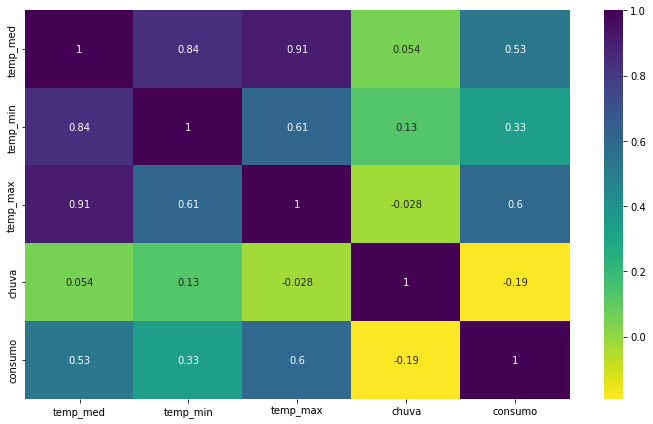

In [31]:
# Plotando heatmap de correlacao

plt.figure(figsize=(10,6))

sns.heatmap(df_beer.corr(), cmap='viridis_r', annot=True)

plt.tight_layout()
plt.show()

In [32]:
# Retirando as colunas de X_train e X_test

X_train.drop(columns=['temp_med', 'temp_min', 'chuva'], inplace=True)

X_test.drop(columns=['temp_med', 'temp_min', 'chuva'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##5. Modelo de Regressao Linear

###**5.1 Criando o modelo**

In [33]:
# Criando o modelo de regressao linear

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

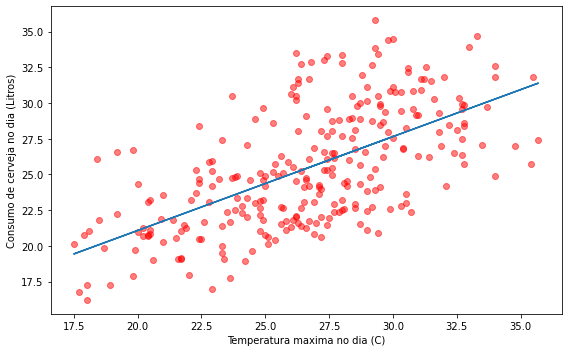

In [34]:
# Plotando

plt.figure(figsize=(8, 5))

plt.scatter(X_train, y_train, color='red', alpha=0.5)

plt.plot(X_train, X_train * lr_model.coef_[0] + lr_model.intercept_)

plt.xlabel('Temperatura maxima no dia (C)')
plt.ylabel('Consumo de cerveja no dia (Litros)')

plt.tight_layout()
plt.show()

###**5.2 Avaliando o Modelo**

In [35]:
# Criando dois objetos -> fitted value e o erro residual

y_hat = lr_model.predict(X_train)

# Valor esperado - previsao
residual = y_train - y_hat

In [36]:
# Criacao de um novo data frame com o valor real, o fitted value e o erro residual

df_r = pd.DataFrame(X_train, columns=['Temperatura Max'])
df_r['Consumo real'] = y_train
df_r['Consumo previso'] = y_hat
df_r['Erro'] = residual

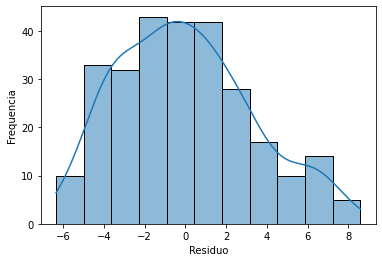

In [37]:
# Histograma

sns.histplot(residual, kde=True)

plt.xlabel('Residuo')
plt.ylabel('Frequencia')

plt.show()

# Distribuicao normal

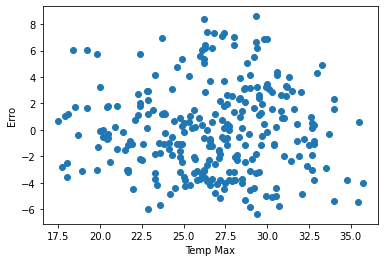

In [38]:
# Scatter plot

plt.scatter(X_train, residual)

plt.xlabel('Temp Max')
plt.ylabel('Erro')

plt.show()

# Sem padrao na distribuicao dos pontos

###**5.3 Inferencia**

In [41]:
# Inferência com os dados de teste

y_hat_t = lr_model.predict(X_test)

array([24.69200386, 27.51630261, 23.96950882, 28.69856721, 20.22567094,
       23.24701379, 21.01384733, 23.96950882, 25.61154299, 24.75768522,
       23.64110199, 26.85948895, 23.77246473, 28.56720448, 27.91039081,
       25.28313615, 25.80858708, 21.93338646, 22.4588374 , 30.60332683,
       23.96950882, 22.91860696, 20.55407777, 29.81515044, 29.22401814,
       25.93994982, 25.41449889, 26.20267528, 24.62632249, 26.39971938,
       25.28313615, 23.96950882, 30.27492   , 23.70678336, 26.33403802,
       28.10743491, 28.96129267, 24.42927839, 31.12877777, 27.25357715,
       26.33403802, 27.05653305, 24.16655292, 21.4736169 , 21.8677051 ,
       21.60497963, 28.17311628, 25.67722435, 21.93338646, 24.88904795,
       31.12877777, 25.08609205, 25.80858708, 25.61154299, 25.08609205,
       26.99085168, 25.61154299, 22.98428833, 26.46540075, 25.80858708,
       26.26835665, 24.95472932, 20.55407777, 25.21745479, 26.20267528,
       20.61975914, 29.35538087, 20.81680324, 22.85292559, 27.12

In [ ]:
# Criando indice

indice = list(range(X_test.shape[0]))

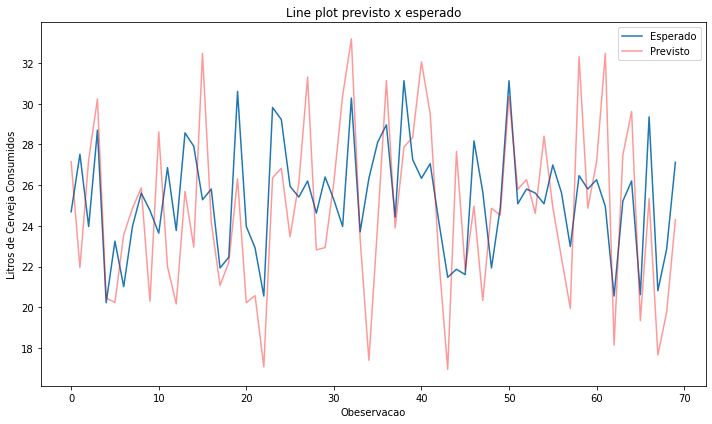

In [59]:
# Line plot yhat x valor real // por indice

plt.figure(figsize=(10,6))

plt.plot(indice, y_hat_t, label='Esperado')
plt.plot(indice, y_test, color='red', alpha=0.4, label='Previsto')

plt.xlabel('Obeservacao', fontsize=10)
plt.ylabel('Litros de Cerveja Consumidos', fontsize=10)
plt.title('Line plot previsto x esperado')
plt.legend()

plt.tight_layout()
plt.show()

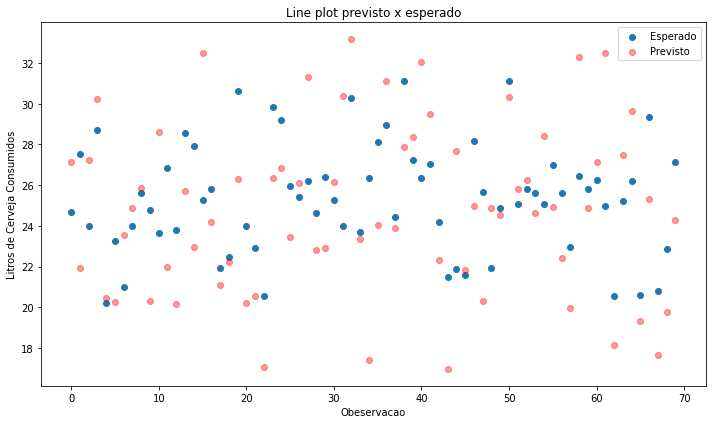

In [60]:
# Scatter plot yhat x valor real // por indice

plt.figure(figsize=(10,6))

plt.scatter(indice, y_hat_t, label='Esperado')
plt.scatter(indice, y_test, color='red', alpha=0.4, label='Previsto')

plt.xlabel('Obeservacao', fontsize=10)
plt.ylabel('Litros de Cerveja Consumidos', fontsize=10)
plt.title('Line plot previsto x esperado')
plt.legend()

plt.tight_layout()
plt.show()

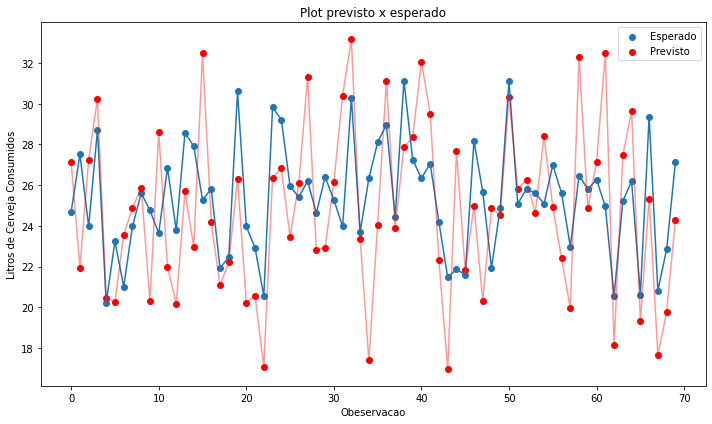

In [64]:
# Juntando os dois // por indice

plt.figure(figsize=(10,6))

plt.plot(indice, y_hat_t)
plt.scatter(indice, y_hat_t, label='Esperado')

plt.plot(indice, y_test, color='red', alpha=0.4)
plt.scatter(indice, y_test, color='red', label='Previsto')

plt.xlabel('Obeservacao', fontsize=10)
plt.ylabel('Litros de Cerveja Consumidos', fontsize=10)
plt.title('Plot previsto x esperado')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Juntando os dois // por temperatura maxima

plt.figure(figsize=(10,6))

plt.scatter(X_test, y_hat_t, label='Esperado')
plt.scatter(X_test, y_test, color='red', alpha=0.6, label='Previsto')

plt.xlabel('Temperatura', fontsize=10)
plt.ylabel('Litros de Cerveja Consumidos', fontsize=10)
plt.title('Plot previsto x esperado')
plt.legend()

plt.tight_layout()
plt.show()

##**5.4 Metricas**